# Linear Regression 

Importing all necessary libraries

In [1]:
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from scipy import linalg
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
x = np.array([5, 20, 45, 60, 85, 100]).reshape((-1, 1))
y = np.array([100, 76, 50, 80, 32, 9])

In [3]:
Model = LinearRegression().fit(x,y)

In [4]:
Model.score(x,y)

0.7937928271054607

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

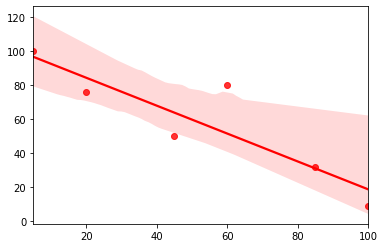

In [5]:
sns.regplot(x,y,data = Model, color='r')

In [6]:
Model.intercept_

100.90476190476193

In [7]:
Model.coef_

array([-0.82040816])

In [8]:
Model.predict(x)

array([96.80272109, 84.49659864, 63.98639456, 51.68027211, 31.17006803,
       18.86394558])

# Linear Regression (From scratch)

In [9]:
x = np.array([5, 20, 45, 60, 85, 100])
y = np.array([100, 76, 50, 80, 32, 9]).reshape((-1, 1))
x = np.vstack((np.ones((x.size, )), x)).T

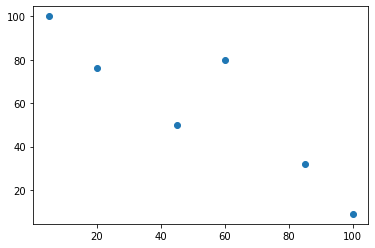

In [10]:
plt.scatter(x[:,1],y)
plt.show()

In [11]:
def linreg(x,y,alpha,itr):
    m = y.size 
    theta = np.zeros((2,1))
    cost_list = []
    
    for i in range(itr):
        
        hx = np.dot(x,theta)
        cost = (1/(2*m))*np.sum(np.square(hx - y))
        
        theta_n = (1/m)*np.dot(x.T,hx-y)
        theta = theta - alpha * theta_n
        
        cost_list.append(cost)
    
    return theta, cost_list

In [12]:
itr = 50
alpha = 0.0001
theta, cost_list = linreg(x,y,alpha = alpha,itr = itr)
theta

array([[0.15328495],
       [0.5432474 ]])

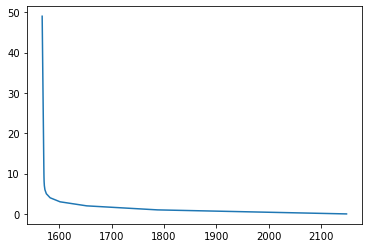

In [13]:
arn = np.arange(0,itr)
plt.plot(cost_list,arn)
plt.show()

# Logistic Regression

In [14]:
a = np.arange(1,11).reshape((-1,1))
b = np.array([0,0,0,0,1,1,0,1,1,1])

In [15]:
model = LogisticRegression(solver='liblinear',random_state = 0).fit(a,b)

In [16]:
model.score(a,b)

0.8

In [17]:
model.intercept_

array([-0.98791895])

In [18]:
model.coef_

array([[0.26235814]])

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

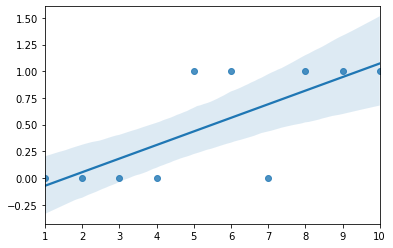

In [19]:
sns.regplot(a,b, data = model)

In [20]:
p = model.predict(a)
p

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [21]:
m = confusion_matrix(b, model.predict(a))
m

array([[3, 2],
       [0, 5]], dtype=int64)

<AxesSubplot:>

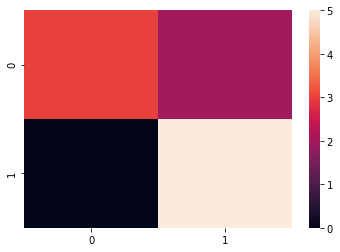

In [22]:
sns.heatmap(m)

# Logistic Regression (From scratch)

In [23]:
a = np.arange(1,11).reshape((-1,1))
b = np.array([0,0,0,1,0,1,1,1,1,1]).reshape((-1,1))

In [24]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [25]:
def model(X, Y, learning_rate, iterations):

    m = a.shape[1]
    n = b.shape[0]
    
    W = np.zeros((n,1))
    B = 0

    cost_list = []

    for i in range(iterations):
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)

        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))

        # Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)

        W = W - learning_rate*dW.T
        B = B - learning_rate*dB

        # Keeping track of our cost function value
        cost_list.append(cost)

        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)

    return W, B, cost_list

In [26]:
iterations = 1000
learning_rate = 0.001
W, B, cost_list = model(a, b, learning_rate = learning_rate, iterations = iterations)

cost after  0 iteration is :  6.931471805599453
cost after  100 iteration is :  0.27018731937710455
cost after  200 iteration is :  0.13337998522944639
cost after  300 iteration is :  0.08835630719282273
cost after  400 iteration is :  0.06601500502152198
cost after  500 iteration is :  0.05267680686249737
cost after  600 iteration is :  0.043816069142785435
cost after  700 iteration is :  0.03750376412922044
cost after  800 iteration is :  0.03277936237160511
cost after  900 iteration is :  0.0291109773902897


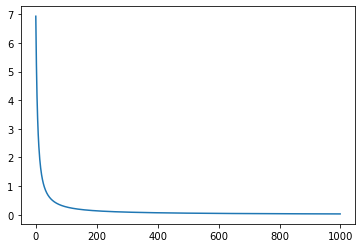

In [27]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [28]:
def accuracy(X, Y, W, B):

    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)

    A = A > 0.5

    A = np.array(A, dtype = 'int64')

    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100

    print("Accuracy of the model is : ", round(acc, 2), "%")

In [29]:
accuracy(a,b, W, B)

Accuracy of the model is :  100.0 %
